# Assignment 5 (ARMAN)

#                                               QUESTION
### Using Python for data analysis.
#### Download the files needed to complete this assignment from here
#### (https://drive.google.com/file/d/1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV/view)
#### This data set contains data from Stack overflow Developer Survey.
#### Use the Python libraries to analyze the date and answer the following questions.
##### a. Find the average age of developers when they wrote their first line of code.
##### b. Deduce the percentage of developers who know python in each country.
##### c. Generate a report for the average salary of developer based on continent.
##### d. Based on this survey, what will be the most desired programming language for the year 2020?
##### e. What is the distribution of people who code as a hobby based on gender and
##### continent (hint: use your mapping of country to continent)?
##### f. Generate the report for job and career satisfaction of developer based on theirgender and continent?
##### g. For problems e and f, gender should have three categories man, woman and others. If a record has any other value, consider it as“Others”.

## Solution:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data1 = pd.read_csv("survey_results_public.csv")

In [32]:
data1.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [33]:
data2 = pd.read_csv("survey_results_schema.csv")

In [34]:
data2.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [35]:
data1.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

# a).Find the average age of developers when they wrote their first line of code. 

In [7]:
data1['Age1stCode']

0         10
1         17
2         22
3         16
4         14
        ... 
88878    NaN
88879    NaN
88880    NaN
88881    NaN
88882     11
Name: Age1stCode, Length: 88883, dtype: object

In [8]:
data1['Age1stCode'].isnull().sum()

1249

In [37]:
data1.shape

(88883, 85)

In [38]:
data1['Age1stCode'].unique()

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', 'Younger than 5 years', '33', '25', '26', '39', '36',
       '38', '28', '31', 'Older than 85', '32', '37', '50', '65', '42',
       '34', '40', '67', '43', '44', '60', '46', '45', '49', '51', '41',
       '55', '83', '48', '53', '54', '47', '56', '79', '61', '68', '77',
       '66', '52', '80', '62', '84', '57', '58', '63'], dtype=object)

In [39]:
mask = data1['Age1stCode'] =='Older than 85'
data1.loc[mask,('Age1stCode')] =86

In [12]:
mask = data1['Age1stCode'] =='Younger than 5 years'
data1.loc[mask,('Age1stCode')] =4

In [13]:
data1['Age1stCode'].isnull().sum()

1249

In [14]:
data1['Age1stCode']=data1['Age1stCode'].astype('float')

In [15]:
data1['Age1stCode'].unique()

array([10., 17., 22., 16., 14., 15., 11., 20., 13., 18., 12., 19., 21.,
        8., 35.,  6.,  9., 29.,  7.,  5., 23., 30., nan, 27., 24.,  4.,
       33., 25., 26., 39., 36., 38., 28., 31., 86., 32., 37., 50., 65.,
       42., 34., 40., 67., 43., 44., 60., 46., 45., 49., 51., 41., 55.,
       83., 48., 53., 54., 47., 56., 79., 61., 68., 77., 66., 52., 80.,
       62., 84., 57., 58., 63.])

In [16]:
data1['Age1stCode'].dtype

dtype('float64')

In [17]:
import numpy as np
np.mean(data1['Age1stCode'])

15.409395896569825

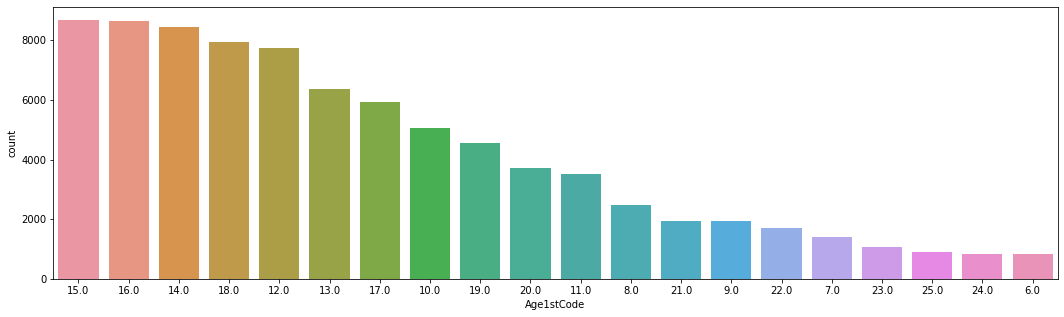

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(x='Age1stCode',data = data1,order = data1['Age1stCode'].value_counts().iloc[:20].index)

# b). Deduce the percentage of developers who know python in each country.

In [22]:
data1['Country'].nunique()

179

In [76]:
languages=data1[data1['LanguageWorkedWith'].notnull()]

In [77]:
languages.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [78]:
countries=languages['Country'].unique()

In [79]:
country_python={}

In [80]:
languages.groupby(['Country'])['LanguageWorkedWith'].value_counts()

Country      LanguageWorkedWith                     
Afghanistan  HTML/CSS;JavaScript;PHP;SQL                3
             HTML/CSS;Java;JavaScript;PHP;Python;SQL    2
             HTML/CSS;Java;PHP;SQL                      2
             Python                                     2
             Assembly                                   1
                                                       ..
Zimbabwe     HTML/CSS;Python;SQL                        1
             Java;JavaScript;Kotlin;Python              1
             Java;JavaScript;SQL                        1
             Objective-C                                1
             Python                                     1
Name: LanguageWorkedWith, Length: 48114, dtype: int64

In [81]:
for country in countries:
    for i in lang.groupby(['Country'])['LanguageWorkedWith'].value_counts()[country].index:
        l=[]
        l.append(i.split(';'))
        for j in l:
            if 'Python' in j:
                if country not in country_python.keys():
                    country_python[country]=1
                else:
                    country_python[country]+=1
        

In [82]:
country_python

{'United Kingdom': 1336,
 'Bosnia and Herzegovina': 29,
 'Thailand': 84,
 'United States': 4504,
 'Ukraine': 192,
 'Canada': 1044,
 'India': 1391,
 'New Zealand': 216,
 'Germany': 1494,
 'Australia': 592,
 'Russian Federation': 504,
 'Brazil': 549,
 'Lithuania': 72,
 'Israel': 327,
 'South Africa': 167,
 'Colombia': 85,
 'Turkey': 296,
 'Argentina': 153,
 'Sri Lanka': 121,
 'Czech Republic': 228,
 'Denmark': 204,
 'Malaysia': 94,
 'Bangladesh': 161,
 'Spain': 468,
 'Serbia': 105,
 'Poland': 504,
 'Sweden': 384,
 'China': 217,
 'France': 748,
 'Netherlands': 559,
 'Italy': 484,
 'Switzerland': 373,
 'Philippines': 106,
 'Ireland': 183,
 'Pakistan': 209,
 'Azerbaijan': 16,
 'Austria': 290,
 'Estonia': 75,
 'Croatia': 80,
 'South Korea': 73,
 'Greece': 184,
 'Japan': 162,
 'Romania': 193,
 'Finland': 224,
 'Bulgaria': 152,
 'Viet Nam': 74,
 'Slovenia': 112,
 'Iran': 211,
 'Belarus': 62,
 'Hungary': 165,
 'Latvia': 37,
 'Hong Kong (S.A.R.)': 82,
 'United Arab Emirates': 47,
 'Portugal': 15

In [99]:
def plot_dimension_count(unique_dim_dict,plot_title):
    dim_count=pd.DataFrame.from_dict(unique_dim_dict,orient='index',dtype=None)
    dim_count.columns=['Count']
    dim_count.sort_values('Count',ascending=False,inplace=True)
    
    dim_count[:10].plot(kind='pie',figsize=(12,12),fontsize=10,title=plot_title,subplots=True,autopct='%1.1f%%');
    print(dim_count[:10])

                    Count
United States        4504
Germany              1494
India                1391
United Kingdom       1336
Canada               1044
France                748
Australia             592
Netherlands           559
Brazil                549
Russian Federation    504


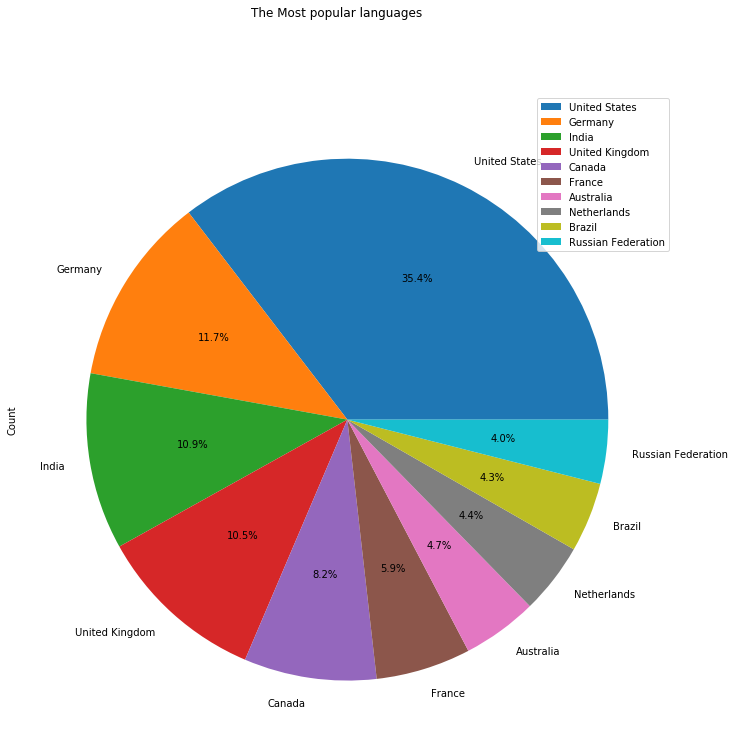

In [100]:
plot_dimension_count(country_python,'The Most popular languages')

# C). Generate a report for the average salary of developer based on continent. 

In [102]:
import pycountry_convert as pc

In [126]:
def country_to_continent (country_name):
    if country_name != 'Other Country (Not Listed Above)':
         # print (country_name)
        try:
            country_alpha2 = pc.country_name_to_country_alpha2 (country_name) 
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2) 
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
        except:
            return "unknown"
    else:
            return "unknown"
            
        

In [127]:
data1['Country'].replace({'Hong Kong (S.A.R.)': 'Hong Kong'},inplace =True)
data1['Country'].replace({'Libyan Arab Jamahiriya': 'Libya'},inplace =True)
data1['Country'].replace({ 'Venezuela, Bolivarian Republic of...:''Venezuela'},inplace=True)
data1['Country'].replace({'The former Yugoslav Republic of Macedonia': 'North Macedonia'}, inplace =True)
data1['Country'].replace({'Republic of Korea':'South Korea'}, inplace =True) 
data1['Country'].replace({ 'Congo, Republic of the...': 'Republic of the Congo'},inplace =True)    
data1['Country'].replace ({'Timor-Leste':'East Timor'},inplace=True)                     

In [130]:
names=[country_to_continent(i) for i in data1['Country']]
data1['Contient']=names

In [135]:
data1['Contient']

0               Europe
1               Europe
2                 Asia
3        North America
4               Europe
             ...      
88878    North America
88879          unknown
88880          unknown
88881          unknown
88882           Europe
Name: Contient, Length: 88883, dtype: object

In [136]:
salary_notnull=data1[data1['ConvertedComp'].notnull()]

In [137]:
a=salary_notnull.groupby(['Contient'])['ConvertedComp'].mean().sort_values(ascending=False)

In [134]:
a.index

Index(['North America', 'Oceania', 'Europe', 'unknown', 'Asia', 'Africa',
       'South America'],
      dtype='object', name='Contient')

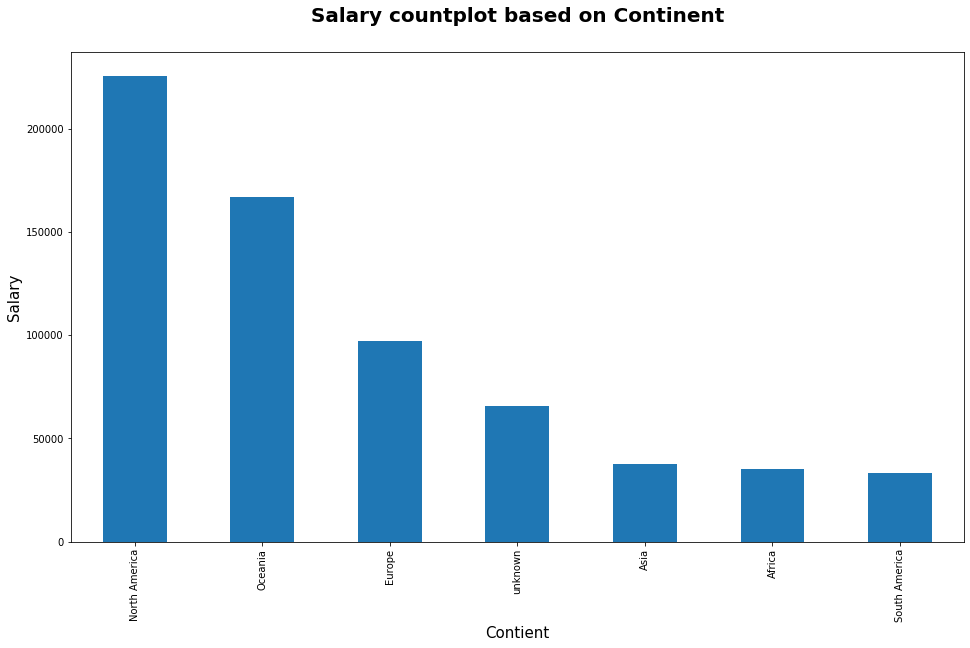

In [143]:
plt.figure(figsize=(16,9))
plt.title('Salary countplot based on Continent',fontsize=20, fontweight='bold', y=1.05,)
plt.ylabel('Salary', fontsize=15)
plt.xlabel('Continent', fontsize=15)
a.plot(kind='bar')

# D). Based on this survey, what will be the most desired programming language forthe year 2020? 

In [146]:
language_desired = data1[data1['LanguageDesireNextYear'].notnull()]


In [147]:
unique_lang={}

In [150]:
for language_set in languages['LanguageDesireNextYear'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_lang.keys():
            unique_lang[language] = 1 
        else:
            unique_lang[language] += 1

In [153]:
unique_lang

{'C': 11008,
 'C++': 16681,
 'C#': 22300,
 'Go': 16995,
 'HTML/CSS': 36389,
 'Java': 23259,
 'JavaScript': 44428,
 'Python': 39720,
 'SQL': 33349,
 'Elixir': 3758,
 'WebAssembly': 8384,
 'Scala': 5533,
 'Bash/Shell/PowerShell': 21217,
 'Erlang': 2095,
 'Ruby': 7188,
 'Rust': 10463,
 'TypeScript': 23640,
 'Other(s):': 7862,
 'Kotlin': 13192,
 'R': 6665,
 'Assembly': 4496,
 'Objective-C': 2804,
 'PHP': 12688,
 'Swift': 8745,
 'VBA': 1591,
 'Clojure': 2717,
 'Dart': 4391,
 'nan': 4109,
 'F#': 3489}

In [178]:
def plot_dimension_count (unique_dim_dict, plot_title):
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns= ['Count']
    dim_count.sort_values('Count', ascending=True, inplace=True)
    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title =plot_title,color='c');

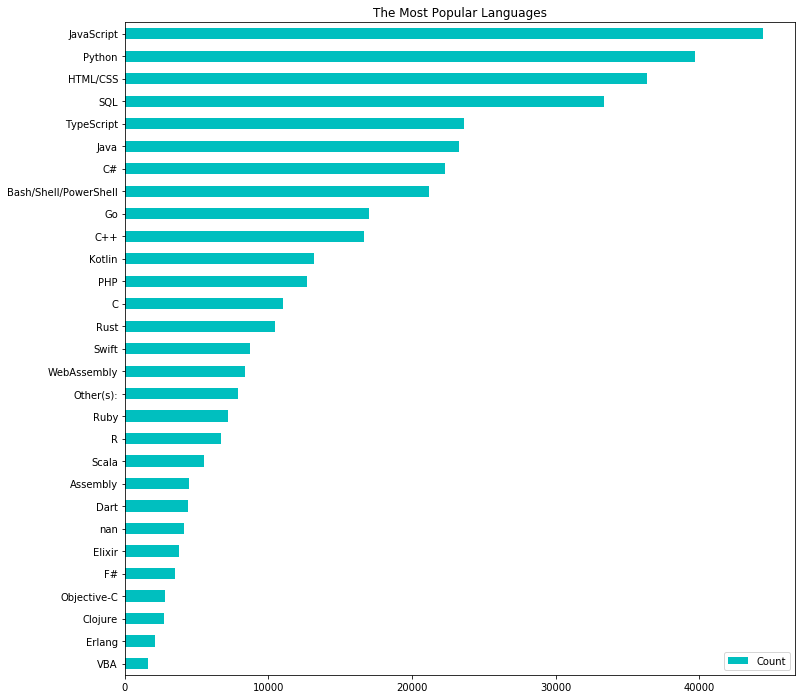

In [179]:
plot_dimension_count(unique_lang, 'The Most Popular Languages')

# e). What is the distribution of people who code as a hobby based on gender and continent (hint: use your mapping of country to continent)? 

In [180]:
data1['Gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [183]:
df=data1[data1['Hobbyist']=='Yes']

In [190]:
data1['Hobbyist']=data1['Hobbyist'].map({'Yes':1,'No':0})

In [192]:
data1['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [196]:
l = []
for i in data1[ 'Gender']:
    if i != 'Man' and i != 'Woman':
        l.append('others')
    else:
        l.append(i)


In [197]:
data1['Gender'] = l

In [198]:
data1['Gender'].value_counts()

Man       77919
Woman      6344
others     4620
Name: Gender, dtype: int64

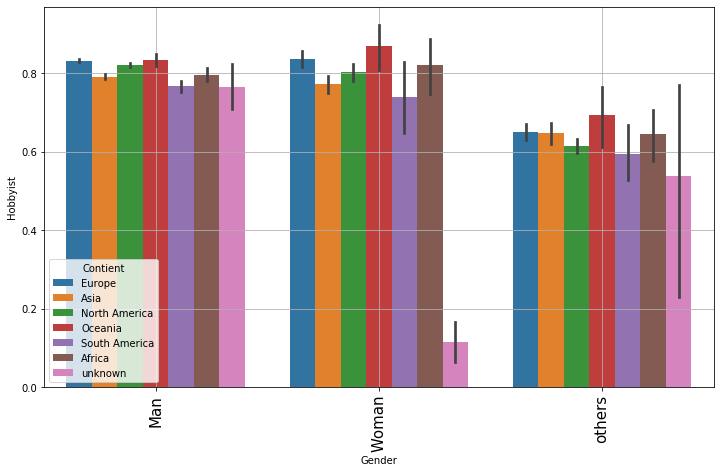

In [202]:
plt.figure(figsize=(12,7))
sns.barplot (x = 'Gender', y='Hobbyist', hue='Contient', data=data1)
plt.grid()
N=3
ind=np.arange(N)
s=(data1['Gender'].value_counts().index)
plt.xticks(ind, s, rotation="vertical", fontsize=15)
plt.show()
plt.show()

# f). Generate the report for job and career satisfaction of developer based on their gender and continent?

In [203]:
data1['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [205]:
data1['JobSat']=data1['JobSat'].map({'Slight satisfied': 5,'Very satisfied':4,'Slight dissatisfied':2 ,'Neither satisfied nor dissatisfied':1})

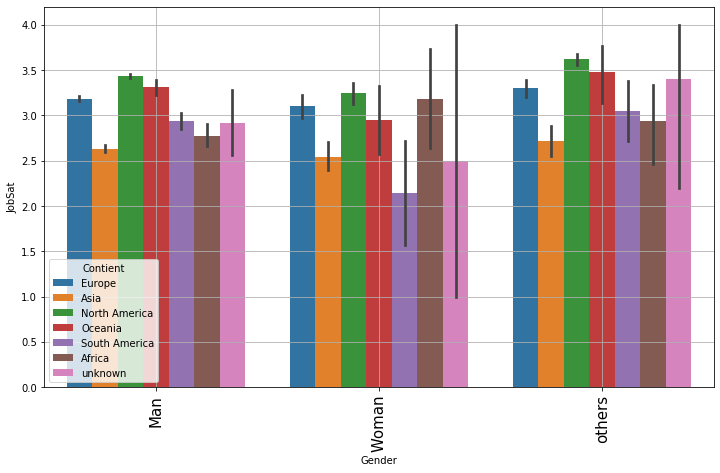

In [206]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'Gender', y='JobSat', hue='Contient', data= data1)
plt.grid()
N=3
ind=np.arange(N)
s=(data1['Gender'].value_counts().index)
plt.xticks(ind, s, rotation='vertical', fontsize=15)
plt.show()
plt.show()